In [1]:
from math import sqrt, factorial, pi, exp, sin, cos, ceil
from fractions import Fraction
import numpy as np
from scipy.special import erf, erfinv
from scipy.stats import norm
from itertools import zip_longest

In [33]:
from matplotlib.patches import ConnectionPatch
from matplotlib.collections import PatchCollection
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle, FancyArrowPatch, Arc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
plt.style.use('seaborn')
%matplotlib inline


legend_opts = {
    'fontsize':12,
    'frameon':True, 
    'framealpha':1,
    'facecolor':'white',
    'edgecolor':'black',
    'labelspacing':0.1}

# Inversion sampling

## Relationship between CDF and PDF of a distribution

In [3]:
def cdf(z):
    return 0.5 + 0.5*erf(z/sqrt(2))

In [4]:
def pdf(z):
    return 1/np.sqrt(2*pi) * np.exp(-z**2/2)

(-0.01, 1.01)

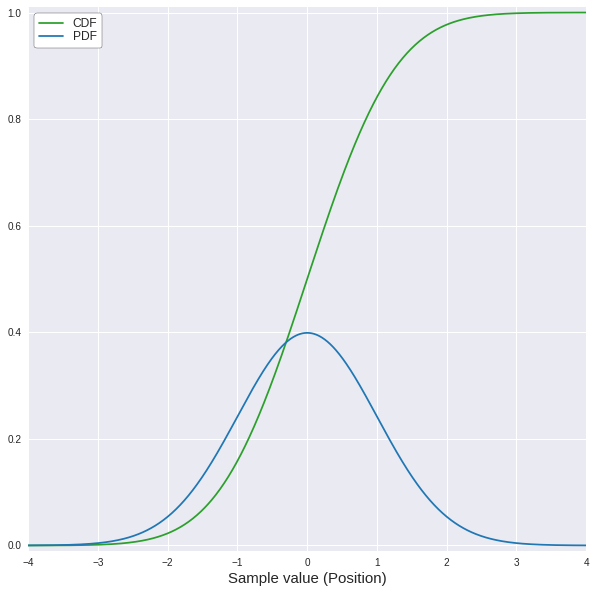

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
z = np.arange(-4, 4.01, 0.01)
ax.plot(z, cdf(z), label=r'CDF', color='tab:green')
ax.plot(z, pdf(z), label=r'PDF', color='tab:blue')
ax.set_xlabel('Sample value (Position)', fontsize=15)
ax.legend(**legend_opts, loc='upper left')
ax.set_xlim(-4, 4)
ax.set_ylim(-0.01, 1.01)

## Sampling from position to area

In [62]:
rng = np.random.RandomState(seed=42)
samples = rng.standard_normal(size=100)
cumprobs = cdf(samples)

In [63]:
def update(i, fig, cdf_ax, density_ax, cumprob_ax, verbose=False):
    if verbose and i%10==0:
        print(i)
    fig.suptitle(f'Sample {i+1}', fontsize=20)
    sample, cumprob = samples[i], cumprobs[i]
    rounded_sample, rounded_cumprob = np.floor(sample), np.floor(cumprob*10)/10
    
    density_counts.setdefault(rounded_sample, 0)
    density_ax.add_artist(Rectangle((rounded_sample, density_counts[rounded_sample]), 1, 1, facecolor='tab:blue'))
    density_counts[rounded_sample] += 1
    
    cumprob_counts.setdefault(rounded_cumprob, 0)
    cumprob_ax.add_artist(Rectangle((cumprob_counts[rounded_cumprob], rounded_cumprob), 1, 0.1, facecolor='tab:green'))
    cumprob_counts[rounded_cumprob] += 1
    
    cdf_ax.scatter(sample, 1, color='tab:blue', clip_on=False, zorder=11)
    cdf_ax.scatter(4, cumprob, color='tab:green', clip_on=False, zorder=12)
    cdf_ax.hlines(cumprob, sample, 4, color='tab:green', linestyles=':', linewidth=1, alpha=0.5)
    cdf_ax.vlines(sample, cumprob, 1, color='tab:blue', linestyles=':', linewidth=1, alpha=0.5)

0
0
10
20
30
40
50
60
70
80
90
0


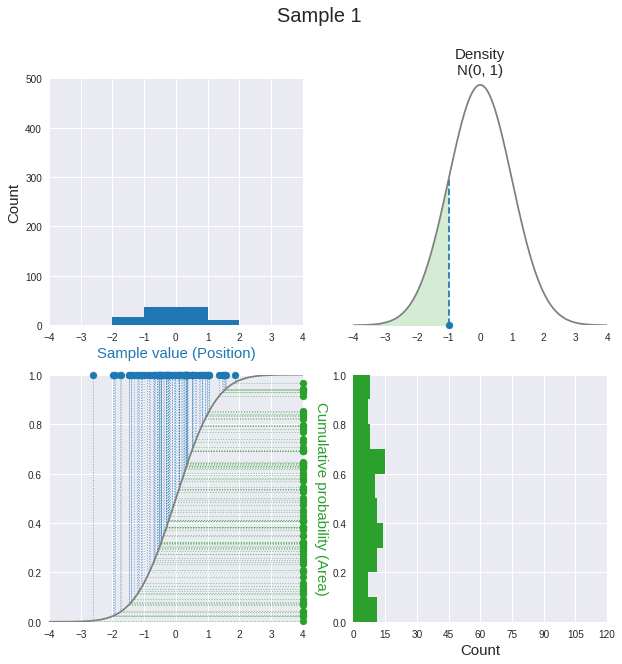

In [64]:
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(2, 2)
z = np.arange(-4, 4.01, 0.01)
z_left = z[z<-1]

cdf_ax = fig.add_subplot(grid[1, 0])
cdf_ax.plot(z, cdf(z), color='tab:gray')
cdf_ax.set_xlim(-4, 4)
cdf_ax.set_ylim(0, 1)

pdf_ax = fig.add_subplot(grid[0, 1], frameon=True)
pdf_ax.patch.set_edgecolor('black') 
pdf_ax.plot(z, pdf(z), color='tab:gray')
pdf_ax.scatter(-1, 0, color='tab:blue', clip_on=False)
pdf_ax.vlines(-1, 0, pdf(-1), linestyles='--', color='tab:blue')
pdf_ax.fill_between(z_left, 0, pdf(z_left), color='tab:green', alpha=0.2)
pdf_ax.set_xlim(-4, 4)
pdf_ax.set_ylim(0, 0.41)
pdf_ax.set_facecolor('white')
pdf_ax.set_yticks([])
pdf_ax.set_xlabel('Density\nN(0, 1)', fontsize=15)
pdf_ax.xaxis.set_label_position('top') 

density_ax = fig.add_subplot(grid[0, 0], sharex=cdf_ax)
density_ax.set_ylim(0, 500)
density_ax.set_xlabel('Sample value (Position)', fontsize=15, color='tab:blue')
density_ax.set_ylabel('Count', fontsize=15)

cumprob_ax = fig.add_subplot(grid[1, 1], sharey=cdf_ax)
cumprob_ax.set_xlim(0, 120)
cumprob_ax.set_xticks(np.arange(0, 121, 15))
cumprob_ax.set_xlabel('Count', fontsize=15)
cumprob_ax.set_ylabel('Cumulative probability (Area)', fontsize=15, rotation=270, va='top', color='tab:green')

density_counts = {}
cumprob_counts = {}
anim = FuncAnimation(fig, lambda i: update(i, fig, cdf_ax, density_ax, cumprob_ax, verbose=True), 
                     frames=range(len(samples)), interval=50, repeat=True)
anim.save('viz/cdf.mp4', writer='ffmpeg')

## Erf(x)

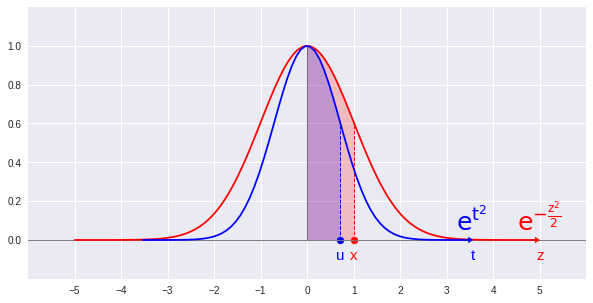

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.axhline(0, color='tab:gray', lw=1, zorder=1)
ax.vlines(0, 0, 1, color='tab:gray', lw=1, zorder=1)

x = 1
z = np.arange(-5, 5, 0.1)
z_plus = np.arange(0, x+0.001, 0.1)

u = x/sqrt(2)
t = np.arange(-5/sqrt(2), 5/sqrt(2), 0.1)
t_plus = np.arange(0, u, 0.1)

ax.plot(z, np.exp(-z**2/2), color='red')
ax.fill_between(z_plus, 0, np.exp(-z_plus**2/2), color='red', alpha=0.2)
ax.arrow(z[-1]-0.1, 0, 0.1, 0, color='red', head_width=0.03, head_length=0.1)
ax.text(z[-1]+0.1, -0.1, 'z', color='red', horizontalalignment='center', fontsize=15)
ax.scatter(x, 0, color='red')
ax.vlines(x, 0, np.exp(-x**2/2), linestyle='--', linewidth=1, color='red')
ax.text(x, -0.1, 'x', color='red', horizontalalignment='center', fontsize=15)

ax.plot(t, np.exp(-t**2), color='blue')
ax.fill_between(t_plus, 0, np.exp(-t_plus**2), color='blue', alpha=0.2)
ax.arrow(t[-1]-0.1, 0, 0.1, 0, color='blue', head_width=0.03, head_length=0.1, zorder=10)
ax.text(t[-1]+0.1, -0.1, 't', color='blue', horizontalalignment='center', fontsize=15)
ax.scatter(u, 0, color='blue')
ax.vlines(u, 0, np.exp(-u**2), linestyle='--', linewidth=1, color='blue')
ax.text(u, -0.1, 'u', color='blue', horizontalalignment='center', fontsize=15)

ax.set_xlim(-6, 6)
ax.set_ylim(-0.2, 1.2)
ax.set_xticks(range(-5, 6))
ax.set_yticks(np.arange(0, 1.01, 0.2))

ax.text(5, 0.05, r'$\mathrm{e^{-\frac{z^{2}}{2}}}$', color='red', fontsize=25, horizontalalignment='center')
ax.text(5/sqrt(2), 0.05, r'$\mathrm{e^{t^{2}}}$', color='blue', fontsize=25, horizontalalignment='center')
plt.show()

## Erfinv(x)

In [13]:
def update_p(p, n):
    dp = [power * coeff for power, coeff in enumerate(p)][1:]
    pf = [0] + p
    two_npf = [2*n*coeff for coeff in pf]
    updated_p = [dp_coeff + two_npf_coeff for dp_coeff, two_npf_coeff in zip_longest(two_npf, dp, fillvalue=0)]
    return updated_p

In [14]:
taylor_coeffs = [0, sqrt(pi)/2]
p = [0, 2]
for n in range(2, 51):
    const = p[0]
    fraction_coeff = Fraction(const, (factorial(n) * 2**n))
    taylor_coeff = fraction_coeff * sqrt(pi)**n
    taylor_coeffs.append(taylor_coeff)
    p = update_p(p, n)

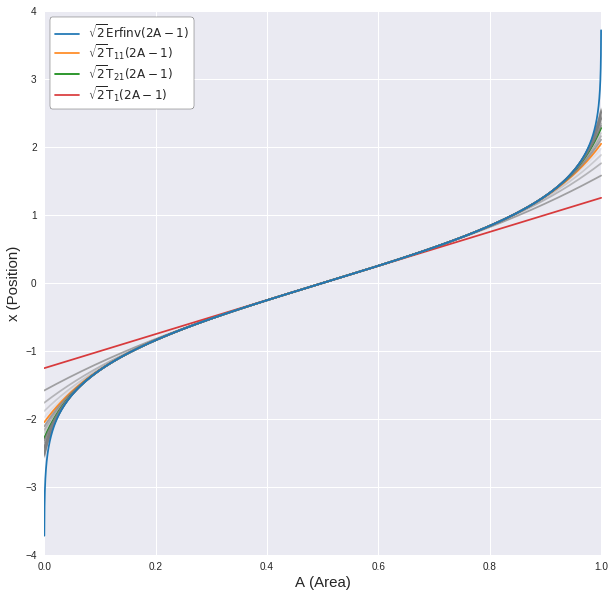

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
a = np.arange(0, 1.0001, 0.0001)
b = 2*a - 1
x = np.zeros(len(a))
color_dict = {1: 'tab:red', 11:'tab:orange', 21:'green'}
label_dict = {1: '$\mathrm{\sqrt{2}{T_1(2A-1)}}$', 11: '$\mathrm{\sqrt{2}T_{11}(2A-1)}$', 21: '$\mathrm{\sqrt{2}T_{21}(2A-1)}$'}

for power, coeff in enumerate(taylor_coeffs):
    x += sqrt(2) * (coeff * b**power)
    if power%2 != 0:
        ax.plot(a, x, color=color_dict.get(power, 'tab:gray'), alpha=(1-0.1*power), label=label_dict.get(power, '_nolegend_'))
ax.plot(a, sqrt(2) * erfinv(b), color='tab:blue', label='$\mathrm{\sqrt{2}Erfinv(2A-1)}$')

ax.set_xlim(-0.001, 1.001)
ax.set_ylim(-4, 4)
ax.set_xlabel('A (Area)', fontsize=15)
ax.set_ylabel('x (Position)', fontsize=15)
ax.legend()

handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels, **legend_opts, loc='upper left')

In [25]:
class InverseCDF:
    def __init__(self, power):
        self.taylor_coeffs = self.calculate_taylor_coeffs(power)
        
    def calculate_taylor_coeffs(self, power):
        taylor_coeffs = [0, sqrt(pi)/2]
        if power < 2:
            return taylor_coeffs[:power+1]
        else:
            p = [0, 2]
            for n in range(2, power+1):
                const = p[0]
                fraction_coeff = Fraction(const, (factorial(n) * 2**n))
                taylor_coeff = fraction_coeff * sqrt(pi)**n
                taylor_coeffs.append(taylor_coeff)
                p = update_p(p, n)
            return taylor_coeffs
    
    def calculate(self, a):
        b = 2*a - 1
        x = sqrt(2) * sum(coeff * b**power for power, coeff in enumerate(self.taylor_coeffs))
        return x

In [26]:
a = 0.9
f21 = InverseCDF(power=21)
f11 = InverseCDF(power=11)
f1 = InverseCDF(power=1)
f1.calculate(a), f11.calculate(a), f21.calculate(a), sqrt(2) * erfinv(2*a-1)

(1.0026513098524001,
 1.2740421698775237,
 1.2810928879786332,
 1.2815515655446004)

In [27]:
rng = np.random.RandomState(seed=42)
unif_samples = rng.uniform(size=(1000, 2))

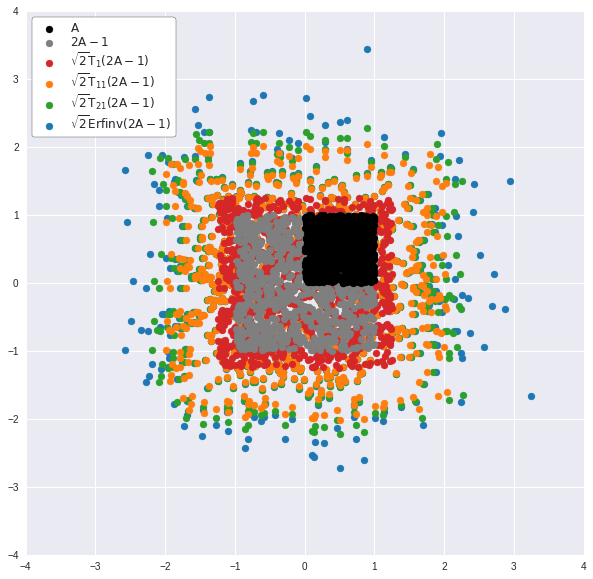

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
def choose_label(i, label):
    if i == 0:
        return label
    else:
        return '_nolegend_'


for i, sample in enumerate(unif_samples):
    ax.scatter(sample[0], sample[1], color='black', zorder=16, label=choose_label(i, '$\mathrm{A}$'))
    ax.scatter(2*sample[0]-1, 2*sample[1]-1, color='tab:gray', zorder=15, label=choose_label(i, '$\mathrm{2A-1}$'))
    ax.scatter(f1.calculate(sample[0]), f1.calculate(sample[1]), color='tab:red', zorder=14, label=choose_label(i, '$\mathrm{\sqrt{2}{T_1(2A-1)}}$'))
    ax.scatter(f11.calculate(sample[0]), f11.calculate(sample[1]), color='tab:orange', zorder=13, label=choose_label(i, '$\mathrm{\sqrt{2}T_{11}(2A-1)}$'))
    ax.scatter(f21.calculate(sample[0]), f21.calculate(sample[1]), color='tab:green', zorder=12, label=choose_label(i, '$\mathrm{\sqrt{2}T_{21}(2A-1)}$'))
    ax.scatter(sqrt(2)*erfinv(2*sample[0]-1), sqrt(2)*erfinv(2*sample[1]-1), color='tab:blue', zorder=11, label=choose_label(i, '$\mathrm{\sqrt{2}Erfinv(2A-1)}$'))

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.legend(**legend_opts)

# Box-Muller

In [51]:
rng = np.random.RandomState(seed=42)
u1s = rng.uniform(size=10)
u2s = rng.uniform(size=10)
ss = -np.log(u1s)
thetas = 2*pi*u2s
rs = np.sqrt(2*ss)
xs = rs * np.cos(thetas)
ys = rs * np.sin(thetas)

In [55]:
def update(i, fig, s_axcenter, s_axbottom, s_axright, 
           theta_axcenter, theta_axbottom, theta_axright, xy_ax, verbose=False):
    if verbose and i%10==0:
        print(i)
    fig.suptitle(f'Sample {i+1}', fontsize=20)
    
    s_axcenter.scatter(u1s[i], 6, color='tab:green', clip_on=False)
    s_axcenter.vlines(u1s[i], ss[i], 6, color='tab:green', linewidth=1, linestyles=':')
    s_axcenter.scatter(1, ss[i], color='tab:blue', clip_on=False)
    s_axcenter.hlines(ss[i], u1s[i], 2*pi, color='tab:blue', linewidth=1, linestyles=':')
    
    theta_axcenter.scatter(u2s[i], 0, color='tab:brown', clip_on=False)
    theta_axcenter.vlines(u2s[i], 0, thetas[i], color='tab:brown', linewidth=1, linestyles=':')
    theta_axcenter.scatter(1, thetas[i], color='tab:red', clip_on=False)
    theta_axcenter.hlines(thetas[i], u2s[i], 2*pi, color='tab:red', linewidth=1, linestyles=':')
    
    
    u1, u2, theta, s = u1s[i], u2s[i], thetas[i], ss[i]
    rounded_u1, rounded_u2, rounded_theta, rounded_s = np.floor(u1*10)/10, np.floor(u2*10)/10, np.floor(theta*10)/10, np.floor(s*10)/10

    u1_counts.setdefault(rounded_u1, 0)
    s_axbottom.add_artist(Rectangle((rounded_u1, u1_counts[rounded_u1]), 0.1, 1, facecolor='tab:green'))
    u1_counts[rounded_u1] += 1
    
    u2_counts.setdefault(rounded_u2, 0)
    theta_axbottom.add_artist(Rectangle((rounded_u2, u2_counts[rounded_u2]), 0.1, 1, facecolor='tab:brown'))
    u2_counts[rounded_u2] += 1

    s_counts.setdefault(rounded_s, 0)
    s_axright.add_artist(Rectangle((s_counts[rounded_s], rounded_s), 1, 0.1, facecolor='tab:blue'))
    s_counts[rounded_s] += 1
    
    theta_counts.setdefault(rounded_theta, 0)
    theta_axright.add_artist(Rectangle((theta_counts[rounded_theta], rounded_theta), 1, 0.1, facecolor='tab:red'))
    theta_counts[rounded_theta] += 1
    
    r, x, y = rs[i], xs[i], ys[i]
    xy_ax.scatter(x, y, color='tab:gray')
    if xy_ax.artists:
        xy_ax.artists = []
    if xy_ax.patches:
        xy_ax.patches = []
    xy_ax.arrow(0, 0, x, y, head_width=0.3, head_length=0.3, length_includes_head=True, color='tab:blue', lw=2)
    xy_ax.add_patch(Arc((0, 0), 1, 1, theta1=0, theta2=theta*180/pi, edgecolor='tab:red', lw=2))

0
0
10
20
30
40
50
60
70
80
90
0


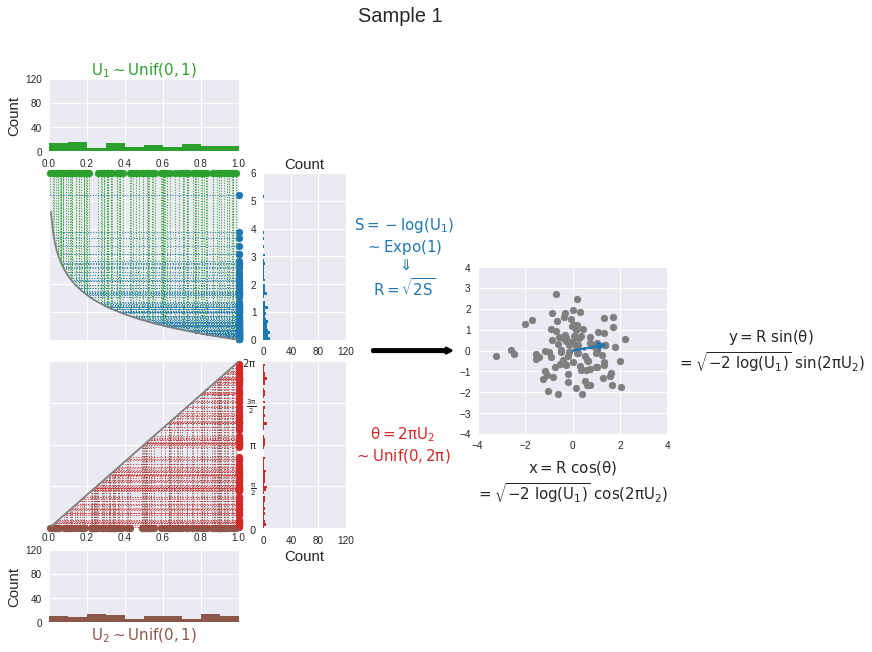

In [56]:
fig = plt.figure(figsize=(13, 10))
grid = plt.GridSpec(6, 7, wspace=0.3, hspace=0.3)
A = np.arange(0.01, 1.01, 0.01)

s_axcenter = fig.add_subplot(grid[1:3, :2])
s_axcenter.set_xlim(0, 1)
s_axcenter.set_ylim(0, 6)
plt.setp(s_axcenter.get_xticklabels(), visible=False)
plt.setp(s_axcenter.get_yticklabels(), visible=False)

s_axtop = fig.add_subplot(grid[0, :2], sharex=s_axcenter)
s_axtop.set_ylim(0, 120)
s_axtop.set_yticks(np.arange(0, 121, 40))
s_axtop.set_xlabel(r'$\mathrm{U_1 \sim Unif(0, 1)}$', fontsize=15, color='tab:green')
s_axtop.xaxis.set_label_position('top') 
s_axtop.set_ylabel('Count', fontsize=15)

s_axright = fig.add_subplot(grid[1:3, 2], sharey=s_axcenter)
s_axright.set_xlim(0, 120)
s_axright.set_xticks(np.arange(0, 121, 40))
s_axright.set_xlabel('Count', fontsize=15)
s_axright.xaxis.set_label_position('top')
s_axright.text(1.1, 0.5, r'$\mathrm{S = -log(U_1)}$' + '\n' r'$\mathrm{\sim Expo(1)}$' + '\n' + r'$\mathrm{\Downarrow}$' + '\n' + r'$\mathrm{R = \sqrt{2S}}$', fontsize=15, color='tab:blue', transform=s_axright.transAxes, va='center', multialignment='center')

theta_axcenter = fig.add_subplot(grid[3:5, :2])
theta_axcenter.set_xlim(0, 1)
theta_axcenter.set_ylim(0, 2*pi)
theta_axcenter.set_yticklabels([r'$\mathrm{0}$', r'$\mathrm{\frac{\pi}{2}}$', r'$\mathrm{\pi}$', r'$\mathrm{\frac{3\pi}{2}}$', r'$\mathrm{2\pi}$'], fontsize=20)
plt.setp(theta_axcenter.get_xticklabels(), visible=False)
plt.setp(theta_axcenter.get_yticklabels(), visible=False)

theta_axbottom = fig.add_subplot(grid[5, :2], sharex=theta_axcenter)
theta_axbottom.set_ylim(0, 120)
theta_axbottom.set_yticks(np.arange(0, 121, 40))
theta_axbottom.xaxis.tick_top()
theta_axbottom.set_xlabel(r'$\mathrm{U_2 \sim Unif(0, 1)}$', fontsize=15, color='tab:brown')
theta_axbottom.set_ylabel('Count', fontsize=15)

theta_axright = fig.add_subplot(grid[3:5, 2], sharey=theta_axcenter)
theta_axright.set_xlim(0, 120)
theta_axright.set_xticks(np.arange(0, 121, 40))
theta_axright.set_yticks([0, pi/2, pi, 3*pi/2, 2*pi])
theta_axright.text(1.1, 0.5, r'$\mathrm{\theta = 2 \pi U_2}$' + '\n' + r'$\mathrm{\sim Unif(0, 2\pi)}}$', fontsize=15, color='tab:red', transform=theta_axright.transAxes, va='center', multialignment='center')
theta_axright.set_xlabel('Count', fontsize=15)

xy_ax = fig.add_subplot(grid[2:4, 4:6])
xy_ax.set_xlim(-4, 4)
xy_ax.set_ylim(-4, 4)
xy_ax.text(0.5, -0.15, r'$\mathrm{x=R\ cos(\theta)}$' + '\n' + r'$\mathrm{=\sqrt{-2\ log( U_{1})} \ cos( 2\pi U_{2})}}$', transform=xy_ax.transAxes, fontsize=15, ha='center', va='top')
xy_ax.text(1.05, 0.5, r'$\mathrm{y=R\ sin(\theta)}$' + '\n' + r'$\mathrm{=\sqrt{-2\ log( U_{1})} \ sin( 2\pi U_{2})}}$', transform=xy_ax.transAxes, fontsize=15, ha='left', va='center', multialignment='center')

s_axcenter.plot(A, -np.log(A), color='tab:gray')
theta_axcenter.plot(A, 2*pi*A, color='tab:gray')

arrow_ax = fig.add_subplot(grid[2:4, 3])
arrow_ax.axis('off')
arrow_ax.annotate('', xy=(1, 0.5), xytext=(0, 0.5), xycoords='axes fraction', arrowprops=dict(arrowstyle='simple', lw=3))

u1_counts = {}
u2_counts = {}
theta_counts = {}
s_counts = {}

anim = FuncAnimation(fig, lambda i: update(i, fig, s_axcenter, s_axtop, s_axright, 
                                           theta_axcenter, theta_axbottom, theta_axright, xy_ax, verbose=True), 
                     frames=range(len(u1s)), interval=100)
anim.save('viz/box_muller.mp4', writer='ffmpeg')

# Central Limit Theorem

In [199]:
n_points = 100
n_additions = 50
rng = np.random.RandomState(seed=24)
u1s = rng.uniform(size=(n_additions, n_points))
u2s = rng.uniform(size=(n_additions, n_points))

In [200]:
sum1s = np.cumsum(u1s, axis=0)
sum2s = np.cumsum(u2s, axis=0)

In [201]:
def plot_qq(ax, values, **kwargs):
    cum_probs = np.arange(1, len(values)) / len(values) 
    percentiles = norm().ppf(cum_probs)
    sorted_values = np.sort(values)[:-1]
    normalized_values = (sorted_values - sorted_values.mean()) / sorted_values.std()
    
    ax.scatter(percentiles, normalized_values, **kwargs)

In [202]:
def update(i, fig, xy_ax, x_ax, y_ax, qq_ax, max_xy, verbose=False):
    if verbose and i%10==0:
        print(i)
    fig.suptitle(f'Addition {i+1}', fontsize=20)
    
    sum1, sum2 = sum1s[i], sum2s[i]
    
    if xy_ax.collections:
        xy_ax.collections = []
    xy_ax.scatter(sum1, sum2, color='tab:gray')
    xy_ax.scatter(sum1, [-10] * len(sum1), color='tab:blue', clip_on=False)
    xy_ax.scatter([-10] * len(sum2), sum2, color='tab:green', clip_on=False)
    
    if x_ax.patches:
        x_ax.patches = []
    x_ax.hist(sum1, bins=np.arange(-5, max_xy, 0.5), color='tab:blue')
    
    if y_ax.patches:
        y_ax.patches = []
    y_ax.hist(sum2, bins=np.arange(-5, max_xy, 0.5), color='tab:green', orientation='horizontal')
    
    if qq_ax.collections:
        qq_ax.collections = []
    plot_qq(qq_ax, sum1, color='tab:blue')
    plot_qq(qq_ax, sum2, color='tab:green')

0
0
10
20
30
40
0


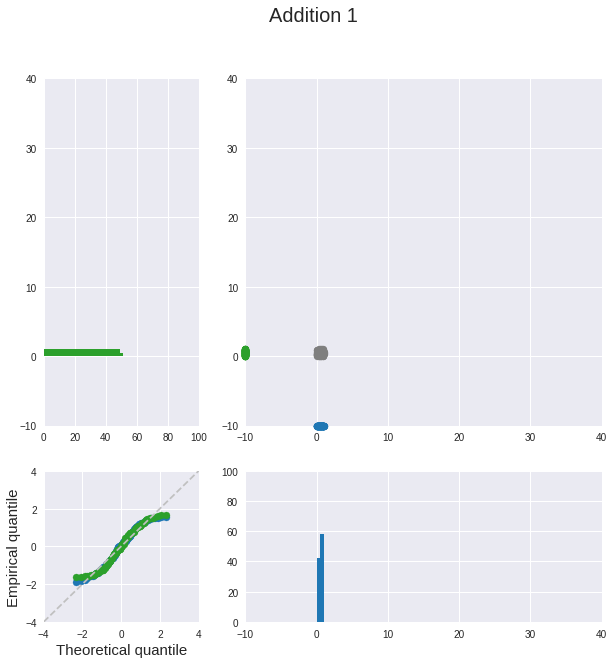

In [203]:
fig = plt.figure(figsize=(10, 10))
grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.3)
xy_ax = fig.add_subplot(grid[:2, 1:])
x_ax = fig.add_subplot(grid[2, 1:], sharex=xy_ax)
y_ax = fig.add_subplot(grid[:2, 0], sharey=xy_ax)
qq_ax = fig.add_subplot(grid[2, 0])

u1s = np.zeros(shape=10)
u2s = np.zeros(shape=10)

def roundup(x):
    return int(ceil(x / 10.0)) * 10

max_xy = roundup(n_additions/2 + 3*sqrt(n_additions/12))
xy_ax.set_xlim(-10, max_xy)
xy_ax.set_ylim(-10, max_xy)
xy_ax.set_xticks(np.arange(-10, max_xy+1, 10))
xy_ax.set_yticks(np.arange(-10, max_xy+1, 10))

x_ax.set_ylim(0, n_points)
y_ax.set_xlim(0, n_points)
qq_ax.set_xlim(-4, 4)
qq_ax.set_ylim(-4, 4)
qq_ax.set_xlabel('Theoretical quantile', fontsize=15)
qq_ax.set_ylabel('Empirical quantile', fontsize=15)

qq_ax.plot([-4, 4], [-4, 4], '--', color='silver')

anim = FuncAnimation(fig, lambda i: update(i, fig, xy_ax, x_ax, y_ax, qq_ax, max_xy, verbose=True), 
                     frames=range(len(sum1s)), interval=200)
anim.save('viz/clt.mp4', writer='ffmpeg')

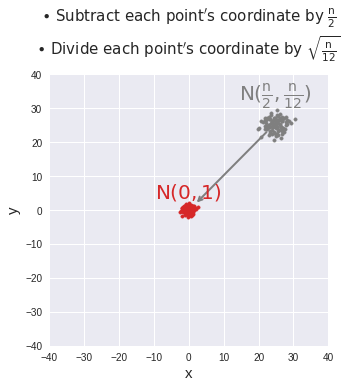

In [210]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.set_xlim(-max_xy, max_xy)
ax.set_ylim(-max_xy, max_xy)
ax.set_xticks(np.arange(-max_xy, max_xy+1, 10))
ax.set_yticks(np.arange(-max_xy, max_xy+1, 10))

unscaled1s, unscaled2s = sum1s[-1], sum2s[-1]
scaled1s, scaled2s = (sum1s[-1]-n_additions/2) / sqrt(n_additions/12), (sum2s[-1]-n_additions/2) / sqrt(n_additions/12)
ax.scatter(unscaled1s, unscaled2s, marker='.',  color='tab:gray', zorder=11)
ax.scatter(scaled1s, scaled2s, marker='.', color='tab:red', zorder=12)
ax.text(unscaled1s.mean(), unscaled2s.mean()+unscaled2s.std()*4, r'$\mathrm{N(\frac{n}{2}, \frac{n}{12})}$', color='tab:gray', ha='center', fontsize=20, zorder=13)
ax.text(scaled1s.mean(), scaled2s.mean()+scaled2s.std()*4, r'$\mathrm{N(0, 1)}$', color='tab:red', ha='center', fontsize=20, zorder=14)
ax.annotate('', xy=(scaled1s.mean()+scaled1s.std()*2, scaled2s.mean()+scaled2s.std()*2), xytext=(unscaled1s.mean()-unscaled1s.std()*1, unscaled2s.mean()-unscaled2s.std()*1), arrowprops=dict(arrowstyle='->', lw=2, color='tab:gray'), zorder=10)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_title(r"$\mathrm{\bullet\ Subtract\ each\ point's\ coordinate\ by\ \frac{n}{2}}$" + '\n' + r"$\mathrm{\bullet\ Divide\ each\ point's\ coordinate\ by\ \sqrt{\frac{n}{12}}}$", fontsize=15, pad=20)
plt.show()